In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
#from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score                # we are using this for model tunning

from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
data = pd.read_csv('D:/Chrome Downloads/Life Expectancy Data.csv')
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
data2 = data.copy()
data2 = data.dropna()            # If there is a missing or empty observation, delete it. Or 'data.fillna(data.mean(), inplace=True)' with this make NaN values take mean

lindata = data2.copy()

In [6]:
lindata.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.050771,-0.037092,0.008029,-0.113365,0.069553,0.114897,-0.053822,0.005739,0.010479,-0.016699,0.059493,0.029641,-0.123405,0.096421,0.012567,0.019757,0.014122,0.122892,0.088732
Life expectancy,0.050771,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,0.542042,-0.192265,0.327294,0.174718,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630
Adult Mortality,-0.037092,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,0.060365,-0.199853,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171
infant deaths,0.008029,-0.169074,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,-0.234425,0.996906,-0.156929,-0.146951,-0.161871,0.007712,-0.098092,0.671758,0.463415,0.461908,-0.134754,-0.214372
Alcohol,-0.113365,0.402718,-0.175535,-0.106217,1.000000,0.417047,0.109889,-0.050110,0.353396,-0.101082,0.240315,0.214885,0.242951,-0.027113,0.443433,-0.028880,-0.403755,-0.386208,0.561074,0.616975
percentage expenditure,0.069553,0.409631,-0.237610,-0.090765,0.417047,1.000000,0.016760,-0.063071,0.242738,-0.092158,0.128626,0.183872,0.134813,-0.095085,0.959299,-0.016792,-0.255035,-0.255635,0.402170,0.422088
Hepatitis B,0.114897,0.199935,-0.105225,-0.231769,0.109889,0.016760,1.000000,-0.124800,0.143302,-0.240766,0.463331,0.113327,0.588990,-0.094802,0.041850,-0.129723,-0.129406,-0.133251,0.184921,0.215182
Measles,-0.053822,-0.068881,-0.003967,0.532680,-0.050110,-0.063071,-0.124800,1.000000,-0.153245,0.517506,-0.057850,-0.113583,-0.058606,-0.003522,-0.064768,0.321946,0.180642,0.174946,-0.058277,-0.115660
BMI,0.005739,0.542042,-0.351542,-0.234425,0.353396,0.242738,0.143302,-0.153245,1.000000,-0.242137,0.186268,0.189469,0.176295,-0.210897,0.266114,-0.081416,-0.547018,-0.554094,0.510505,0.554844
under-five deaths,0.010479,-0.192265,0.060365,0.996906,-0.101082,-0.092158,-0.240766,0.517506,-0.242137,1.000000,-0.171164,-0.145803,-0.178448,0.019476,-0.100331,0.658680,0.464785,0.462289,-0.148097,-0.226013


In [7]:
df=lindata.copy()
#df.columns.values[3] = 'aju'
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

In [9]:
df=lindata[['percentage expenditure','GDP','Income composition of resources','Schooling',' BMI ','Life expectancy ']]
df

,percentage expenditure,GDP,Income composition of resources,Schooling,BMI,Life expectancy
0,71.279624,584.259210,0.479,10.1,19.1,65.0
1,73.523582,612.696514,0.476,10.0,18.6,59.9
2,73.219243,631.744976,0.470,9.9,18.1,59.9
3,78.184215,669.959000,0.463,9.8,17.6,59.5
4,7.097109,63.537231,0.454,9.5,17.2,59.2
...,...,...,...,...,...,...
2933,0.000000,454.366654,0.407,9.2,27.1,44.3
2934,0.000000,453.351155,0.418,9.5,26.7,44.5
2935,0.000000,57.348340,0.427,10.0,26.3,44.8
2936,0.000000,548.587312,0.427,9.8,25.9,45.3


In [10]:
df = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)
df.head()

,00,percentage expenditure,GDP,Income composition of resources,Schooling,BMI,Life expectancy
0,1,71.279624,584.259210,0.479,10.1,19.1,65.0
1,1,73.523582,612.696514,0.476,10.0,18.6,59.9
2,1,73.219243,631.744976,0.470,9.9,18.1,59.9
3,1,78.184215,669.959000,0.463,9.8,17.6,59.5
4,1,7.097109,63.537231,0.454,9.5,17.2,59.2


In [11]:
y = df.iloc[:, 6]
X = df.drop(columns='Life expectancy ')

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   00                               1649 non-null   int64  
 1   percentage expenditure           1649 non-null   float64
 2   GDP                              1649 non-null   float64
 3   Income composition of resources  1649 non-null   float64
 4   Schooling                        1649 non-null   float64
 5    BMI                             1649 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 90.2 KB


In [13]:
for i in range(1, len(X.columns)):
    X.iloc[:,i] = X.iloc[:,i]/np.max(X.iloc[:,i])
X.head()

,00,percentage expenditure,GDP,Income composition of resources,Schooling,BMI
0,1,0.003759,0.004903,0.511752,0.487923,0.247730
1,1,0.003878,0.005141,0.508547,0.483092,0.241245
2,1,0.003861,0.005301,0.502137,0.478261,0.234760
3,1,0.004123,0.005622,0.494658,0.473430,0.228275
4,1,0.000374,0.000533,0.485043,0.458937,0.223087


In [14]:
theta = np.array([0]*len(X.columns))

In [15]:
m = len(df)

In [16]:
def hypothesis(theta, X):
    return theta*X

In [17]:
def computeCost(X, y, theta):
    y1 = hypothesis(theta, X)
    y1=np.sum(y1, axis=1)
    return sum((y1-y)**2)/(2*1649)

In [18]:
def gradientDescent(X, y, theta, alpha, i):
    J = []  #cost function in each iterations
    k = 0
    while k < i:        
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-y)*X.iloc[:,c])/len(X))
        j = computeCost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

In [19]:
J, j, theta = gradientDescent(X, y, theta, 0.05, 100)

In [20]:
y_hat = hypothesis(theta, X)
y_hat = np.sum(y_hat, axis=1)

In [21]:
y_hat

0       44.777543
1       44.630931
2       44.436241
3       44.225526
4       43.885559
          ...    
2933    43.871766
2934    44.171152
2935    44.544766
2936    44.402170
2937    44.478033
Length: 1649, dtype: float64

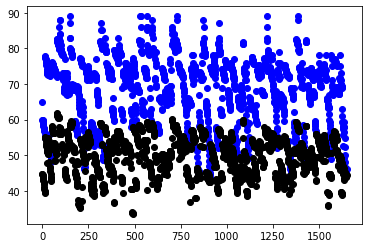

In [22]:

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0, 1649)),y= y, color='blue')         
plt.scatter(x=list(range(0, 1649)), y=y_hat, color='black')
plt.show()

In [39]:
J2=[]
a=gradientDescent(X, y, theta, 0.05, 1)[1]
print(a)
b=gradientDescent(X, y, theta, 0.05, 11)[1]
#c=gradientDescent(X, y, theta, 0.05, 15)[1]
d=gradientDescent(X, y, theta, 0.05, 21)[1]
e=gradientDescent(X, y, theta, 0.05, 31)[1]
f=gradientDescent(X, y, theta, 0.05, 41)[1]
g=gradientDescent(X, y, theta, 0.05, 51)[1]
h=gradientDescent(X, y, theta, 0.05, 61)[1]
n=gradientDescent(X, y, theta, 0.05, 71)[1]
m=gradientDescent(X, y, theta, 0.05, 81)[1]
o=gradientDescent(X, y, theta, 0.05, 91)[1]
J2.append(a)
J2.append(b)
#J2.append(c)
J2.append(d)
J2.append(e)
J2.append(f)
J2.append(g)
J2.append(h)
J2.append(n)
J2.append(m)
J2.append(o)

202.45169491295465


In [41]:
for v in range(1,100,10):
    print (v)

1
11
21
31
41
51
61
71
81
91


In [40]:
J3=[]
for q in range(1,100):
    t=gradientDescent(X, y, theta, 0.05, q)[1]
    J3.append(t)

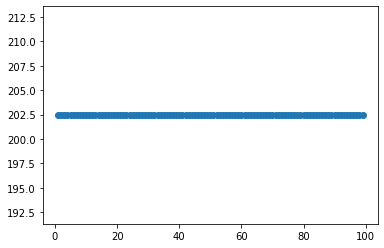

In [43]:
plt.figure()
plt.scatter(x=list(range(1, 100)), y=J3)
plt.show()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [62]:
#8(b)In L1 regularization, the cost function is updated with adding (the sum of absolute value of weight)*regularization parameter where some of the
#weights are zero by penalizing it at each iteration
# List to maintain the cross-validation scores
cross_val_scores_lasso = []
 
# List to maintain the different values of Lambda
Lambda = []
 
# Loop to compute the cross-validation scores
for i in range(1, 100):
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
    lassoModel.fit(X_train, y_train)
    scores = cross_val_score(lassoModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score)
    Lambda.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))

0.25 : 53.656336959107506
0.5 : 44.406673833262225
0.75 : 31.72427751453443
1.0 : 13.653031303573801
1.25 : -7.518237733937427
1.5 : -8.149687643573026
1.75 : -8.149687643573026
2.0 : -8.149687643573026
2.25 : -8.149687643573026
2.5 : -8.149687643573026
2.75 : -8.149687643573026
3.0 : -8.149687643573026
3.25 : -8.149687643573026
3.5 : -8.149687643573026
3.75 : -8.149687643573026
4.0 : -8.149687643573026
4.25 : -8.149687643573026
4.5 : -8.149687643573026
4.75 : -8.149687643573026
5.0 : -8.149687643573026
5.25 : -8.149687643573026
5.5 : -8.149687643573026
5.75 : -8.149687643573026
6.0 : -8.149687643573026
6.25 : -8.149687643573026
6.5 : -8.149687643573026
6.75 : -8.149687643573026
7.0 : -8.149687643573026
7.25 : -8.149687643573026
7.5 : -8.149687643573026
7.75 : -8.149687643573026
8.0 : -8.149687643573026
8.25 : -8.149687643573026
8.5 : -8.149687643573026
8.75 : -8.149687643573026
9.0 : -8.149687643573026
9.25 : -8.149687643573026
9.5 : -8.149687643573026
9.75 : -8.149687643573026
10.0 :

In [63]:
def computeCost2(X, y, theta,alpha):
    y2 = hypothesis(theta, X)
    y2=np.sum(y2, axis=1)
    z=sum((y2-y)**2)/(2*1649)
    r=alpha*theta
    return z+r
css=[]
dj=[]
for i in range(1, 10):
    cost=computeCost2(X_train,y_train,theta,i*0.25)
    #lassoModel.fit(X_train, y_train)
    #scores = cross_val_score(lassoModel, X, y, cv = 10)
    #avg_cross_val_score = mean(scores)*100
    css.append(cost)
    dj.append(i * 0.25)
    # Loop to print the different values of cross-validation scores
for i in range(0, len(dj)):
    print(str(dj[i])+' : '+str(css[i]))

0.25 : [161.19708325 153.69708325 153.69708325 157.44708325 156.44708325
 155.44708325]
0.5 : [168.69708325 153.69708325 153.69708325 161.19708325 159.19708325
 157.19708325]
0.75 : [176.19708325 153.69708325 153.69708325 164.94708325 161.94708325
 158.94708325]
1.0 : [183.69708325 153.69708325 153.69708325 168.69708325 164.69708325
 160.69708325]
1.25 : [191.19708325 153.69708325 153.69708325 172.44708325 167.44708325
 162.44708325]
1.5 : [198.69708325 153.69708325 153.69708325 176.19708325 170.19708325
 164.19708325]
1.75 : [206.19708325 153.69708325 153.69708325 179.94708325 172.94708325
 165.94708325]
2.0 : [213.69708325 153.69708325 153.69708325 183.69708325 175.69708325
 167.69708325]
2.25 : [221.19708325 153.69708325 153.69708325 187.44708325 178.44708325
 169.44708325]


In [50]:
#8(c)In L2 regularization, the cost function is updated with adding the (sum of squared value of weight)**regularization parameter
# List to maintain the different cross-validation scores
cross_val_scores_ridge = []
 
# List to maintain the different values of alpha
alpha = []
 
# Loop to compute the different values of cross-validation scores
for i in range(1, 100):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train, y_train)
    scores = cross_val_score(ridgeModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : 58.24892416257259
0.5 : 58.307234237675296
0.75 : 58.35644563741735
1.0 : 58.39911985447534
1.25 : 58.43654049651883
1.5 : 58.46949891865797
1.75 : 58.49855028170038
2.0 : 58.52411686487456
2.25 : 58.54653684584117
2.5 : 58.56609036163567
2.75 : 58.58301489145876
3.0 : 58.59751509884216
3.25 : 58.60976954887506
3.5 : 58.61993553312357
3.75 : 58.628152677212455
4.0 : 58.63454572425573
4.25 : 58.6392267360052
4.5 : 58.64229686780954
4.75 : 58.6438478224282
5.0 : 58.64396305600646
5.25 : 58.64271878899105
5.5 : 58.640184861013644
5.75 : 58.63642545926319
6.0 : 58.63149974310999
6.25 : 58.62546238282458
6.5 : 58.61836402657226
6.75 : 58.61025170709118
7.0 : 58.601169197323614
7.25 : 58.59115732260265
7.5 : 58.58025423567618
7.75 : 58.56849565979581
8.0 : 58.55591510424817
8.25 : 58.54254405601347
8.5 : 58.52841215066999
8.75 : 58.51354732519473
9.0 : 58.4979759549229
9.25 : 58.48172297660501
9.5 : 58.464811999228715
9.75 : 58.447265404043904
10.0 : 58.42910443503659
10.25 : 58.41034

In [64]:
def computeCost3(X, y, theta,alpha):
    y2 = hypothesis(theta, X)
    y2=np.sum(y2, axis=1)
    z=sum((y2-y)**2)/(2*1649)
    r=alpha*(theta**2)
    return z+r
css1=[]
dj1=[]
for i in range(1, 10):
    cost1=computeCost2(X_train,y_train,theta,i*0.25)
    #lassoModel.fit(X_train, y_train)
    #scores = cross_val_score(lassoModel, X, y, cv = 10)
    #avg_cross_val_score = mean(scores)*100
    css1.append(cost1)
    dj1.append(i * 0.25)
    # Loop to print the different values of cross-validation scores
for i in range(0, len(dj1)):
    print(str(dj1[i])+' : '+str(css1[i]))

0.25 : [161.19708325 153.69708325 153.69708325 157.44708325 156.44708325
 155.44708325]
0.5 : [168.69708325 153.69708325 153.69708325 161.19708325 159.19708325
 157.19708325]
0.75 : [176.19708325 153.69708325 153.69708325 164.94708325 161.94708325
 158.94708325]
1.0 : [183.69708325 153.69708325 153.69708325 168.69708325 164.69708325
 160.69708325]
1.25 : [191.19708325 153.69708325 153.69708325 172.44708325 167.44708325
 162.44708325]
1.5 : [198.69708325 153.69708325 153.69708325 176.19708325 170.19708325
 164.19708325]
1.75 : [206.19708325 153.69708325 153.69708325 179.94708325 172.94708325
 165.94708325]
2.0 : [213.69708325 153.69708325 153.69708325 183.69708325 175.69708325
 167.69708325]
2.25 : [221.19708325 153.69708325 153.69708325 187.44708325 178.44708325
 169.44708325]
